<a href="https://colab.research.google.com/github/Aras1703/CNN-Maize_leaf_Classifier/blob/main/Maize_Leaf_Image_Classification_using_CNN_(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import shutil
!pip install split-folders
import splitfolders

In [ ]:
drive.mount('/content/drive/')

local_zip = '/content/drive/My Drive/Data image/Maize Leaf Disease.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
base_dir = '/tmp/data'

In [ ]:
os.listdir(base_dir)

['Blight', 'Healthy', 'Common_Rust', 'train', 'val', 'Gray_Leaf_Spot']

In [ ]:
splitfolders.ratio(base_dir, output=base_dir, ratio=(0.8,0.2))

Copying files: 4188 files [00:01, 3637.33 files/s]


In [ ]:
train_dir = os.path.join(base_dir, 'train')

In [ ]:
val_dir = os.path.join(base_dir, 'val')

In [ ]:
(os.listdir(train_dir))

['Blight', 'Healthy', 'Common_Rust', 'Gray_Leaf_Spot']

In [ ]:
os.listdir(val_dir)

['Blight', 'Healthy', 'Common_Rust', 'Gray_Leaf_Spot']

In [ ]:
print('total train blight images :', len(os.listdir('/tmp/data/train/Blight')))
print('total train common rust images :', len(os.listdir('/tmp/data/train/Common_Rust')))
print('total train gray spot images :', len(os.listdir('/tmp/data/train/Gray_Leaf_Spot')))
print('total train healthy images :', len(os.listdir('/tmp/data/train/Healthy')))

print('\n')

print('total val blight images :', len(os.listdir('/tmp/data/val/Blight')))
print('total val common rust images :', len(os.listdir('/tmp/data/val/Common_Rust')))
print('total val gray spot images :', len(os.listdir('/tmp/data/val/Gray_Leaf_Spot')))
print('total val healthy images :', len(os.listdir('/tmp/data/val/Healthy')))

total train blight images : 916
total train common rust images : 1044
total train gray spot images : 459
total train healthy images : 929


total val blight images : 230
total val common rust images : 262
total val gray spot images : 115
total val healthy images : 233


In [ ]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                zoom_range=0.2,
                shear_range = 0.2
)

val_datagen = ImageDataGenerator(
              rescale=1./255,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(220, 220),
        batch_size=16,
        class_mode='categorical'
) 

Found 3348 images belonging to 4 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(220, 220),
        batch_size=16,
        class_mode='categorical'
)

Found 840 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 218, 218, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 107, 107, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 53, 53, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 51, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 25, 25, 128)      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=val_generator,
    validation_steps=2,
    verbose=1
)

Epoch 1/20
20/20 [==============================] - 40s 2s/step - loss: 3.6992 - accuracy: 0.2812 - val_loss: 2.9486 - val_accuracy: 0.3438
Epoch 2/20
20/20 [==============================] - 39s 2s/step - loss: 2.4976 - accuracy: 0.4531 - val_loss: 2.0349 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 39s 2s/step - loss: 1.6970 - accuracy: 0.6219 - val_loss: 1.2426 - val_accuracy: 0.8750
Epoch 4/20
20/20 [==============================] - 39s 2s/step - loss: 1.2299 - accuracy: 0.7656 - val_loss: 1.0176 - val_accuracy: 0.7812
Epoch 5/20
20/20 [==============================] - 40s 2s/step - loss: 1.0891 - accuracy: 0.7625 - val_loss: 1.0913 - val_accuracy: 0.8125
Epoch 6/20
20/20 [==============================] - 40s 2s/step - loss: 1.0272 - accuracy: 0.7437 - val_loss: 1.0709 - val_accuracy: 0.6562
Epoch 7/20
20/20 [==============================] - 39s 2s/step - loss: 0.9961 - accuracy: 0.7406 - val_loss: 1.0837 - val_accuracy: 0.7188
Epoch 8/20
20/20 [==

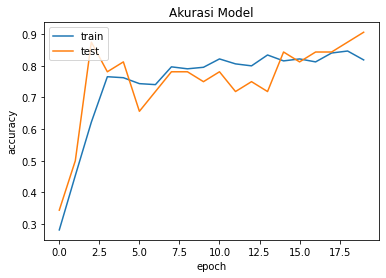

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

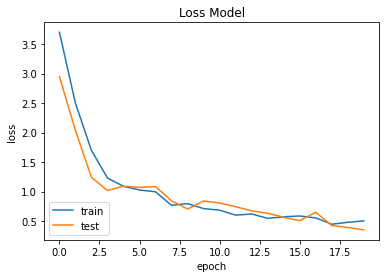

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

Saving Corn_Gray_Spot (51).JPG to Corn_Gray_Spot (51) (1).JPG
Corn_Gray_Spot (51).JPG
gray spot


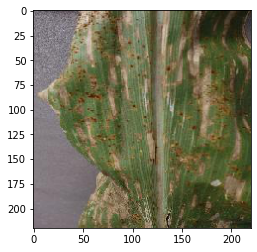

In [ ]:
import numpy as np
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(220,220))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  if classes[0][0]==1:
    print('blight')
  elif classes[0][1]==1:
    print('common rust')
  elif classes[0][2]==1:
    print('gray spot')
  elif classes[0][3]==1:
    print('healthy')
  else:
    print('unknown')